<a href="https://colab.research.google.com/github/woodstone10/data_visualization-python/blob/main/NetworkRTTAnalysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
###########################################################################################
#
# NetworkRTTAnalysis_2.ipynb
#
# This is sample code for data visualizaiton with Google Colab (Jupyter notebook)
#  1. Bokeh
#  2. Plotly
#  3. Matplotlib
#  4. Seaborn
#  5. Altair
#
# Created by Jonggil Nam
# LinkedIn: https://www.linkedin.com/in/jonggil-nam-6099a162/
# Github: https://github.com/woodstone10
# e-mail: woodstone10@gmail.com
# phone: +82-10-8709-6299
###########################################################################################

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_file, show
from bokeh.layouts import column
from bokeh.io import output_notebook

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import seaborn as sns

import altair as alt

In [4]:
def parseCSV(df):
    date = df['Record End Date*']
    hour = df['Record End Hour*']
    timeE = df['Procedure End Time*']
    timeS = df['Procedure Start Time*']
    procID = df['Proc ID #1']
    procCFC = df['Proc CFC #1']
    procCFCQ = df['Proc CFCQ #1']
    porcCFCQ2 = df['Proc CFCQ2 #1']
    procCat = df['Proc Category #1*']
    global rrcCat
    rrcCat = df['RRC Category*']
    cmr1 = df['First  CMR Trigger']
    global cmr1_rsrp
    cmr1_rsrp = df['First  CMR RSRP Serving (dBm)']
    global cmr1_rsrq
    cmr1_rsrq = df['First  CMR RSRQ Serving (dB)']
    global cdmaRxType
    cdmaRxType = df['CDMA Rcvr Type']

In [5]:
# Data from CSV, for example, cellular network RTT log
df = pd.read_csv(# dataset (csv) read from github
                 'https://raw.githubusercontent.com/woodstone10/dataset/main/LG%20G5_%20High%20RD%20and%20AF_%20SU14.csv')
                 # datraset (csv) read from google drive
                 #'My Drive/My Colab/dataset/LG G5_ High RD and AF_ SU14.csv')
parseCSV(df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (26,27,110,126,239,291,292,299) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
# Data Visualizaiton with Bokeh
# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()
#output_file('output.html')
RRC_CATEGORY = ["RRC Excl", "Good", "RSF", "RD"] # <-- category for string display
CDMARXTYPE = ["Dual-Receiver (1x)", "Single Receiver"] # <-- category for string display
fig1 = figure(title = 'RRC Category', y_range=RRC_CATEGORY, plot_width=1300, plot_height=300, x_axis_label = 'time', y_axis_label = 'Y axis')
fig1.circle(list(range(0,len(rrcCat))), rrcCat, legend_label='RRC Category', color='red', line_width=2)
fig2 = figure(title = 'First  CMR RSRP Serving', plot_width=1300, plot_height=300, x_axis_label = 'time', y_axis_label = 'Y axis')
fig2.line(list(range(0,len(cmr1_rsrp))), cmr1_rsrp, legend_label='First  CMR RSRP Serving', color='blue', line_width=2)
fig3 = figure(title = 'First  CMR RSRQ Serving', plot_width=1300, plot_height=300, x_axis_label = 'time', y_axis_label = 'Y axis')
fig3.line(list(range(0,len(cmr1_rsrq))), cmr1_rsrq, legend_label='First  CMR RSRQ Serving', color='green', line_width=2)
fig4 = figure(title = 'CDMA Rcvr Type', y_range=CDMARXTYPE, plot_width=1300, plot_height=300, x_axis_label = 'time', y_axis_label = 'Y axis')
fig4.line(list(range(0,len(cdmaRxType))), cdmaRxType, legend_label='CDMA Rcvr Type', color='purple', line_width=2)
show(column(fig1, fig2, fig3, fig4))

In [7]:
# Data Visualizaiton with Plotly Express
#fig = px.line(df, x = list(range(0,len(cmr1_rsrq))), y = 'First  CMR RSRP Serving (dBm)', title='First  CMR RSRP Serving (dBm)')
fig = make_subplots(rows=4, cols=1, subplot_titles=("RRC Category", "First  CMR RSRP Serving", "First  CMR RSRQ Serving", "CDMA Rcvr Type"))
fig.add_trace( go.Scatter(x = list(range(0,len(rrcCat))), y = rrcCat), row=1, col=1 )
fig.add_trace( go.Scatter(x = list(range(0,len(cmr1_rsrp))), y = cmr1_rsrp), row=2, col=1 )
fig.add_trace( go.Scatter(x = list(range(0,len(cmr1_rsrq))), y = cmr1_rsrq), row=3, col=1 )
fig.add_trace( go.Scatter(x = list(range(0,len(cdmaRxType))), y = cdmaRxType), row=4, col=1 )
fig.show()

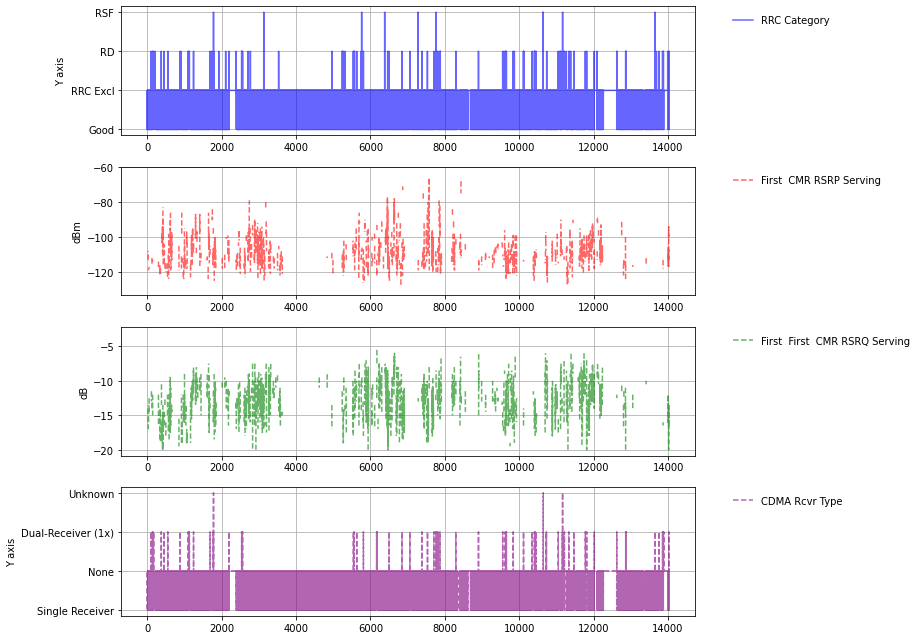

In [23]:
# Data Visualizaiton with matplotlib
fig=plt.figure(figsize=(13,9))
plt.subplot(4,1,1)
plt.plot(list(range(0,len(rrcCat))), rrcCat, label='RRC Category', color='blue', linestyle='-', alpha=0.6)
plt.grid()
plt.ylabel('Y axis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize="medium", edgecolor="white")
plt.subplot(4,1,2)
plt.plot(list(range(0,len(cmr1_rsrp))), cmr1_rsrp, label='First  CMR RSRP Serving', color='red', linestyle='--', alpha=0.6)
plt.grid()
plt.ylabel('dBm')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize="medium", edgecolor="white")
plt.subplot(4,1,3)
plt.plot(list(range(0,len(cmr1_rsrq))), cmr1_rsrq, label='First  First  CMR RSRQ Serving', color='green', linestyle='--', alpha=0.6)
plt.grid()
plt.ylabel('dB')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize="medium", edgecolor="white")
plt.subplot(4,1,4)
cdmaRxType = cdmaRxType.replace({np.NaN:"None"}) #<-- empty (Nan) to None
plt.plot(cdmaRxType, label='CDMA Rcvr Type', color='purple', linestyle='--', alpha=0.6)
plt.grid()
plt.ylabel('Y axis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize="medium", edgecolor="white")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



TypeError: ignored

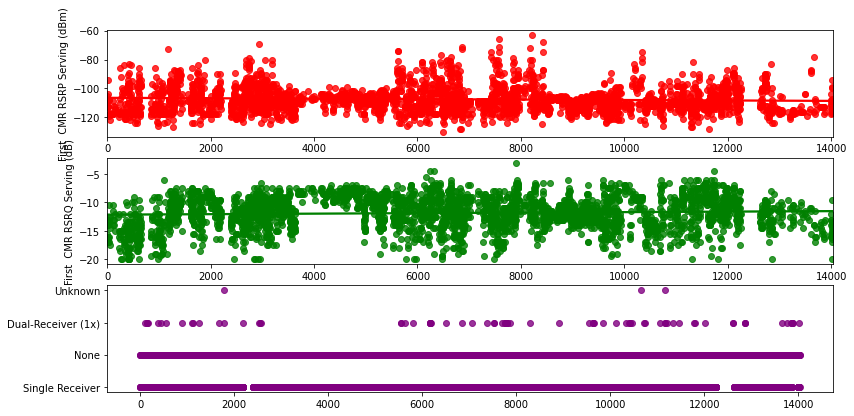

In [24]:
# Data Visualizaiton with Seanborn
fig=plt.figure(figsize=(13,9))
plt.subplot(4,1,1)
sns.regplot(list(range(0,len(cmr1_rsrp))), cmr1_rsrp, label='First  CMR RSRP Serving', color='red')
plt.subplot(4,1,2)
sns.regplot(list(range(0,len(cmr1_rsrq))), cmr1_rsrq, label='First  First  CMR RSRQ Serving', color='green')
plt.subplot(4,1,3)
sns.regplot(list(range(0,len(cmr1_rsrq))), cdmaRxType, label='CDMA Rcvr Type', color='purple')
plt.show()

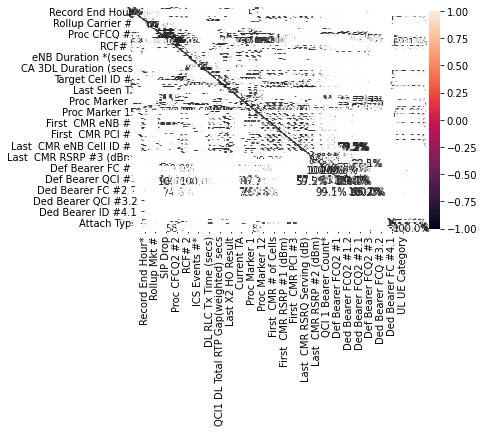

In [25]:
sns.heatmap(df.corr(), fmt='.1%', annot=True)
plt.show()

In [51]:
x = np.arange(len(cmr1_rsrp))
x

array([    0,     1,     2, ..., 14027, 14028, 14029])

In [52]:
source = pd.DataFrame({
  'x': x,
  'f(x)': np.sin(x / 5)
})

alt.Chart(source).mark_line().encode(
    x='x',
    y='f(x)'
)

MaxRowsError: ignored

alt.Chart(...)